In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function for visualization
def visualize_activation(x, y, title):
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid(True)
    plt.legend()
    plt.show()


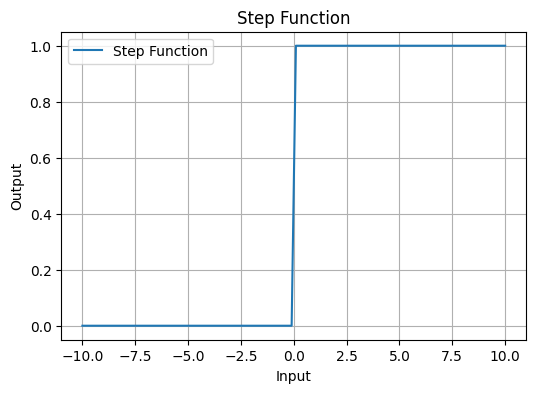

In [16]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

x = np.linspace(-10, 10, 100)
y = step_function(x)
visualize_activation(x, y, "Step Function")


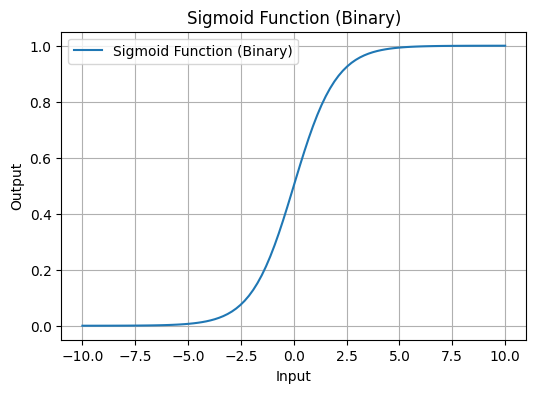

In [17]:
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

y = sigmoid_binary(x)
visualize_activation(x, y, "Sigmoid Function (Binary)")


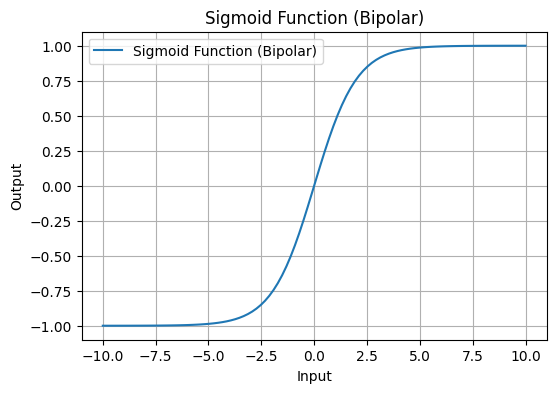

In [18]:
def sigmoid_bipolar(x):
    return 2 / (1 + np.exp(-x)) - 1

y = sigmoid_bipolar(x)
visualize_activation(x, y, "Sigmoid Function (Bipolar)")


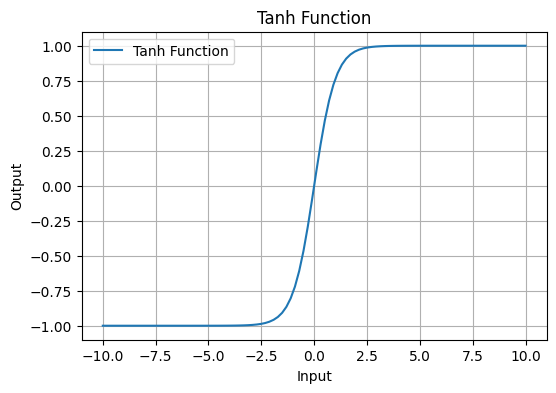

In [19]:
def tanh_function(x):
    return np.tanh(x)

y = tanh_function(x)
visualize_activation(x, y, "Tanh Function")


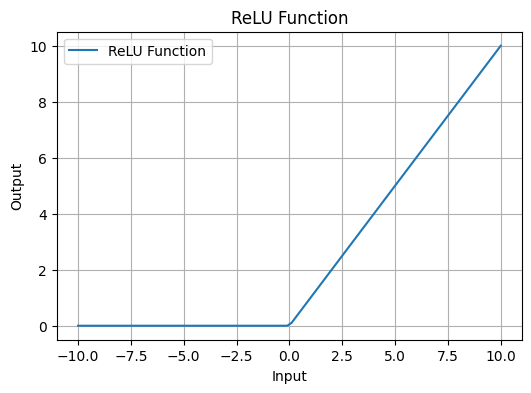

In [20]:
def relu_function(x):
    return np.maximum(0, x)

y = relu_function(x)
visualize_activation(x, y, "ReLU Function")


Training and evaluating networks with different activation functions...
Activation Function: Sigmoid, Test Accuracy: 1.0000
Activation Function: Tanh, Test Accuracy: 1.0000
Activation Function: ReLU, Test Accuracy: 1.0000


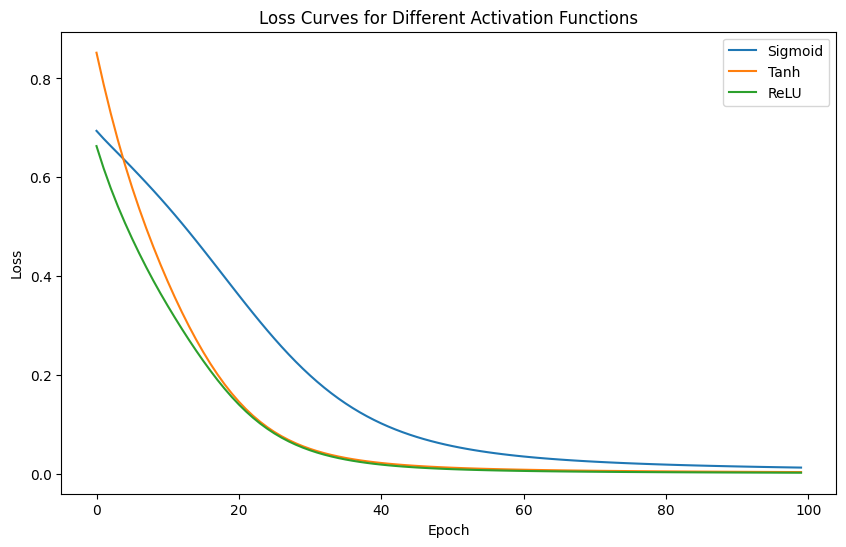

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Create a simple neural network with customizable activation function
def create_nn(activation):
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train the model and return the training history
def train_and_plot(activation_func, name):
    model = create_nn(activation_func)

    # Train the model and store the history
    history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

    # Predict on test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Activation Accuracy: {acc:.4f}")

    # Plot the loss and accuracy
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{name} Activation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{name} Activation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train and visualize for Sigmoid
train_and_plot('sigmoid', 'Sigmoid')

# Train and visualize for Tanh
train_and_plot('tanh', 'Tanh')

# Train and visualize for ReLU
train_and_plot('relu', 'ReLU')
